In [3]:
import requests
import pandas as pd

In [4]:
url = 'https://ll.thespacedevs.com/2.2.0/launch/previous/?status=3&year=2020,2021,2022,2023,2019,2018,2017,2016,2015,2014,2013&mode=list&limit=100'  # Replace with your API endpoint
launch_data = []
while url:
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        launch_data.extend(data['results'])
        url = data['next']  # Update URL for next page
    else:
        print('Failed to fetch data')
        break

# Creating a DataFrame from all the retrieved launch data
df = pd.DataFrame(launch_data)

In [6]:
pd.set_option('display.max_columns', None)
df

,id,url,slug,name,status,last_updated,net,net_precision,window_end,window_start,lsp_name,mission,mission_type,pad,location,landing,landing_success,launcher,orbit,image,infographic,type
0,0a399298-8e59-4ad3-80bd-3e211dff7596,https://ll.thespacedevs.com/2.2.0/launch/0a399...,hyperbola-1-dear-1,Hyperbola-1 | DEAR-1,"{'id': 3, 'name': 'Launch Successful', 'abbrev...",2023-12-17T09:52:23Z,2023-12-17T07:00:00Z,"{'id': 1, 'name': 'Minute', 'abbrev': 'MIN', '...",2023-12-17T08:27:00Z,2023-12-17T06:53:00Z,iSpace,DEAR-1,Technology,Launch Area 95A,"Jiuquan Satellite Launch Center, People's Repu...",None,NaN,None,SSO,https://spacelaunchnow-prod-east.nyc3.digitalo...,None,list
1,d524b397-7670-4183-b807-03a4c0d705de,https://ll.thespacedevs.com/2.2.0/launch/d524b...,soyuz-21bfregat-m-arktika-m-no2,Soyuz 2.1b/Fregat-M | Arktika-M No.2,"{'id': 3, 'name': 'Launch Successful', 'abbrev...",2023-12-17T08:51:07Z,2023-12-16T09:17:48Z,"{'id': 0, 'name': 'Second', 'abbrev': 'SEC', '...",2023-12-16T09:17:48Z,2023-12-16T09:17:48Z,Russian Federal Space Agency (ROSCOSMOS),Arktika-M No.2,Earth Science,31/6,"Baikonur Cosmodrome, Republic of Kazakhstan",None,NaN,None,Elliptical,https://spacelaunchnow-prod-east.nyc3.digitalo...,None,list
2,ebefa135-366c-4a21-afdf-af4d18ea360b,https://ll.thespacedevs.com/2.2.0/launch/ebefa...,long-march-5-yaogan-41,Long March 5 | Yaogan 41,"{'id': 3, 'name': 'Launch Successful', 'abbrev...",2023-12-16T08:56:49Z,2023-12-15T13:41:00Z,"{'id': 1, 'name': 'Minute', 'abbrev': 'MIN', '...",2023-12-15T14:26:00Z,2023-12-15T13:32:00Z,China Aerospace Science and Technology Corpora...,Yaogan 41,Government/Top Secret,101,"Wenchang Space Launch Site, People's Republic ...",None,NaN,None,GTO,https://spacelaunchnow-prod-east.nyc3.digitalo...,None,list
3,2918b5f6-1340-4c73-bb75-4f9b5e16999f,https://ll.thespacedevs.com/2.2.0/launch/2918b...,electron-the-moon-god-awakens-qps-sar-5,Electron | The Moon God Awakens (QPS-SAR-5),"{'id': 3, 'name': 'Launch Successful', 'abbrev...",2023-12-16T12:43:37Z,2023-12-15T04:05:00Z,"{'id': 1, 'name': 'Minute', 'abbrev': 'MIN', '...",2023-12-15T06:00:00Z,2023-12-15T04:00:00Z,Rocket Lab,The Moon God Awakens (QPS-SAR-5),Earth Science,Rocket Lab Launch Complex 1B,"Onenui Station, Mahia Peninsula, New Zealand",PAC,0.0,42,LEO,https://spacelaunchnow-prod-east.nyc3.digitalo...,None,list
4,ea4825db-6866-40dd-932d-bacdb1c705ab,https://ll.thespacedevs.com/2.2.0/launch/ea482...,long-march-2fg-chinese-reusable-space-vehicle-3,Long March 2F/G | Chinese Reusable Space Vehicle,"{'id': 3, 'name': 'Launch Successful', 'abbrev...",2023-12-15T01:46:02Z,2023-12-14T14:12:00Z,"{'id': 1, 'name': 'Minute', 'abbrev': 'MIN', '...",2023-12-14T17:10:00Z,2023-12-14T14:01:00Z,China Aerospace Science and Technology Corpora...,Chinese Reusable Space Vehicle,Government/Top Secret,Launch Area 4 (SLS-1 / 921),"Jiuquan Satellite Launch Center, People's Repu...",None,NaN,None,LEO,https://spacelaunchnow-prod-east.nyc3.digitalo...,None,list
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,336ea74b-3076-40a1-825a-e72d070ad430,https://ll.thespacedevs.com/2.2.0/launch/336ea...,ariane-5-eca-azerspace-1africasat-1a-amazonas-3,Ariane 5 ECA | Azerspace-1/Africasat-1a & Amaz...,"{'id': 3, 'name': 'Launch Successful', 'abbrev...",2023-06-14T04:00:47Z,2013-02-07T21:36:07Z,None,2013-02-07T21:36:07Z,2013-02-07T21:36:07Z,Arianespace,Azerspace-1/Africasat-1a & Amazonas 3,Communications,Ariane Launch Area 3,"Kourou, French Guiana",None,NaN,None,GTO,https://spacelaunchnow-prod-east.nyc3.digitalo...,None,list
1310,2b79ea88-25f7-4573-9ccd-cf47a868f2d0,https://ll.thespacedevs.com/2.2.0/launch/2b79e...,soyuz-21afregat-6-x-globalstar-2-4,Soyuz-2.1a/Fregat | 6 x Globalstar-2,"{'id': 3, 'name': 'Launch Successful', 'abbrev...",2023-06-14T03:41:17Z,2013-02-06T16:04:24Z,None,2013-02-06T16:04:24Z,2013-02-06T16:04:24Z,Starsem SA,6 x Globalstar-2,Communications,31/6,"Baikonur Cosmodrome, Republic of Kazakhstan",None,NaN,None,LEO,h

In [7]:
# List of columns you want to remove
columns_to_remove = ["id", "url", "slug", "status", "last_updated", "net", "net_precision", "window_end", "launcher", "infographic", "type"]

In [8]:
# Removing the specified columns
df = df.drop(columns=columns_to_remove)

In [9]:
df = df.rename(columns={'window_start': 'date'})


In [11]:
# Convert string to datetime format
df['date'] = pd.to_datetime(df['date'])

# Convert the datetime to the desired format: 'YYYY-MM-DD HH:MM:SS'
df['date'] = df['date'].dt.strftime('%Y-%m-%d %H:%M:%S')


In [16]:
df

,name,date,lsp_name,mission,mission_type,pad,location,landing,landing_success,orbit,image
0,Hyperbola-1 | DEAR-1,2023-12-17 06:53:00,iSpace,DEAR-1,Technology,Launch Area 95A,"Jiuquan Satellite Launch Center, People's Repu...",None,NaN,SSO,https://spacelaunchnow-prod-east.nyc3.digitalo...
1,Soyuz 2.1b/Fregat-M | Arktika-M No.2,2023-12-16 09:17:48,Russian Federal Space Agency (ROSCOSMOS),Arktika-M No.2,Earth Science,31/6,"Baikonur Cosmodrome, Republic of Kazakhstan",None,NaN,Elliptical,https://spacelaunchnow-prod-east.nyc3.digitalo...
2,Long March 5 | Yaogan 41,2023-12-15 13:32:00,China Aerospace Science and Technology Corpora...,Yaogan 41,Government/Top Secret,101,"Wenchang Space Launch Site, People's Republic ...",None,NaN,GTO,https://spacelaunchnow-prod-east.nyc3.digitalo...
3,Electron | The Moon God Awakens (QPS-SAR-5),2023-12-15 04:00:00,Rocket Lab,The Moon God Awakens (QPS-SAR-5),Earth Science,Rocket Lab Launch Complex 1B,"Onenui Station, Mahia Peninsula, New Zealand",PAC,0.0,LEO,https://spacelaunchnow-prod-east.nyc3.digitalo...
4,Long March 2F/G | Chinese Reusable Space Vehicle,2023-12-14 14:01:00,China Aerospace Science and Technology Corpora...,Chinese Reusable Space Vehicle,Government/Top Secret,Launch Area 4 (SLS-1 / 921),"Jiuquan Satellite Launch Center, People's Repu...",None,NaN,LEO,https://spacelaunchnow-prod-east.nyc3.digitalo...
...,...,...,...,...,...,...,...,...,...,...,...
1309,Ariane 5 ECA | Azerspace-1/Africasat-1a & Amaz...,2013-02-07 21:36:07,Arianespace,Azerspace-1/Africasat-1a & Amazonas 3,Communications,Ariane Launch Area 3,"Kourou, French Guiana",None,NaN,GTO,https://spacelaunchnow-prod-east.nyc3.digitalo...
1310,Soyuz-2.1a/Fregat | 6 x Globalstar-2,2013-02-06 16:04:24,Starsem SA,6 x Globalstar-2,Communications,31/6,"Baikonur Cosmodrome, Republic of Kazakhstan",None,NaN,LEO,https://spacelaunchnow-prod-east.nyc3.digitalo...
1311,Atlas V 401 | TDRS-K,2013-01-31 01:48:00,United Launch Alliance,TDRS-K,Communications,Space Launch Complex 41,"Cape Canaveral, FL, USA",None,NaN,GTO,https://spacelaunchnow-prod-east.nyc3.digitalo...
1312,Naro-1 | STSAT-2C,2013-01-30 07:00:00,Korea Aerospace Research Institute,None,None,LC-1,"Naro Space Center, South Korea",None,NaN,None,None


In [13]:
df.to_csv('launch_data.csv', index=False)

In [17]:
df

,name,date,lsp_name,mission,mission_type,pad,location,landing,landing_success,orbit,image
0,Hyperbola-1 | DEAR-1,2023-12-17 06:53:00,iSpace,DEAR-1,Technology,Launch Area 95A,"Jiuquan Satellite Launch Center, People's Repu...",None,NaN,SSO,https://spacelaunchnow-prod-east.nyc3.digitalo...
1,Soyuz 2.1b/Fregat-M | Arktika-M No.2,2023-12-16 09:17:48,Russian Federal Space Agency (ROSCOSMOS),Arktika-M No.2,Earth Science,31/6,"Baikonur Cosmodrome, Republic of Kazakhstan",None,NaN,Elliptical,https://spacelaunchnow-prod-east.nyc3.digitalo...
2,Long March 5 | Yaogan 41,2023-12-15 13:32:00,China Aerospace Science and Technology Corpora...,Yaogan 41,Government/Top Secret,101,"Wenchang Space Launch Site, People's Republic ...",None,NaN,GTO,https://spacelaunchnow-prod-east.nyc3.digitalo...
3,Electron | The Moon God Awakens (QPS-SAR-5),2023-12-15 04:00:00,Rocket Lab,The Moon God Awakens (QPS-SAR-5),Earth Science,Rocket Lab Launch Complex 1B,"Onenui Station, Mahia Peninsula, New Zealand",PAC,0.0,LEO,https://spacelaunchnow-prod-east.nyc3.digitalo...
4,Long March 2F/G | Chinese Reusable Space Vehicle,2023-12-14 14:01:00,China Aerospace Science and Technology Corpora...,Chinese Reusable Space Vehicle,Government/Top Secret,Launch Area 4 (SLS-1 / 921),"Jiuquan Satellite Launch Center, People's Repu...",None,NaN,LEO,https://spacelaunchnow-prod-east.nyc3.digitalo...
...,...,...,...,...,...,...,...,...,...,...,...
1309,Ariane 5 ECA | Azerspace-1/Africasat-1a & Amaz...,2013-02-07 21:36:07,Arianespace,Azerspace-1/Africasat-1a & Amazonas 3,Communications,Ariane Launch Area 3,"Kourou, French Guiana",None,NaN,GTO,https://spacelaunchnow-prod-east.nyc3.digitalo...
1310,Soyuz-2.1a/Fregat | 6 x Globalstar-2,2013-02-06 16:04:24,Starsem SA,6 x Globalstar-2,Communications,31/6,"Baikonur Cosmodrome, Republic of Kazakhstan",None,NaN,LEO,https://spacelaunchnow-prod-east.nyc3.digitalo...
1311,Atlas V 401 | TDRS-K,2013-01-31 01:48:00,United Launch Alliance,TDRS-K,Communications,Space Launch Complex 41,"Cape Canaveral, FL, USA",None,NaN,GTO,https://spacelaunchnow-prod-east.nyc3.digitalo...
1312,Naro-1 | STSAT-2C,2013-01-30 07:00:00,Korea Aerospace Research Institute,None,None,LC-1,"Naro Space Center, South Korea",None,NaN,None,None


In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

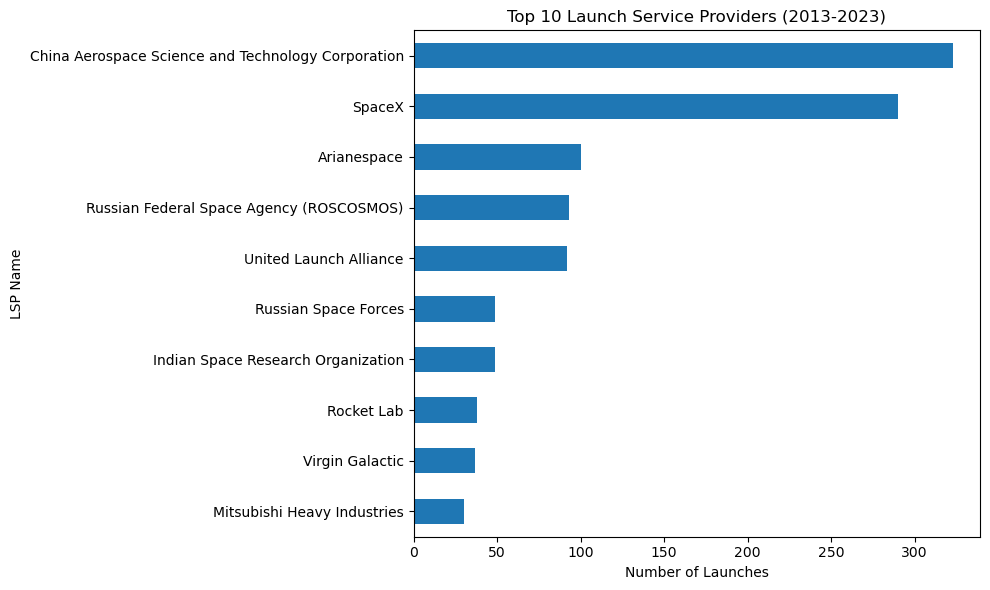

In [55]:
# Use df['lsp_name'].value_counts() to get the counts
lsp_counts = df['lsp_name'].value_counts().head(10)  # Extract top 10 counts
lsp_counts = lsp_counts.sort_values(ascending=True)  # Sort values in descending order

plt.figure(figsize=(10, 6))
bars = lsp_counts.plot(kind='barh')
plt.xlabel('Number of Launches')
plt.ylabel('LSP Name')
plt.title('Top 10 Launch Service Providers (2013-2023)')
plt.yticks(rotation=90)  # Rotate y-axis labels for better readability

# Rotate the y-axis tick labels for better readability
for tick in bars.get_yticklabels():
    tick.set_rotation(0)  # 0 degrees keeps labels horizontal

plt.tight_layout()
plt.show()

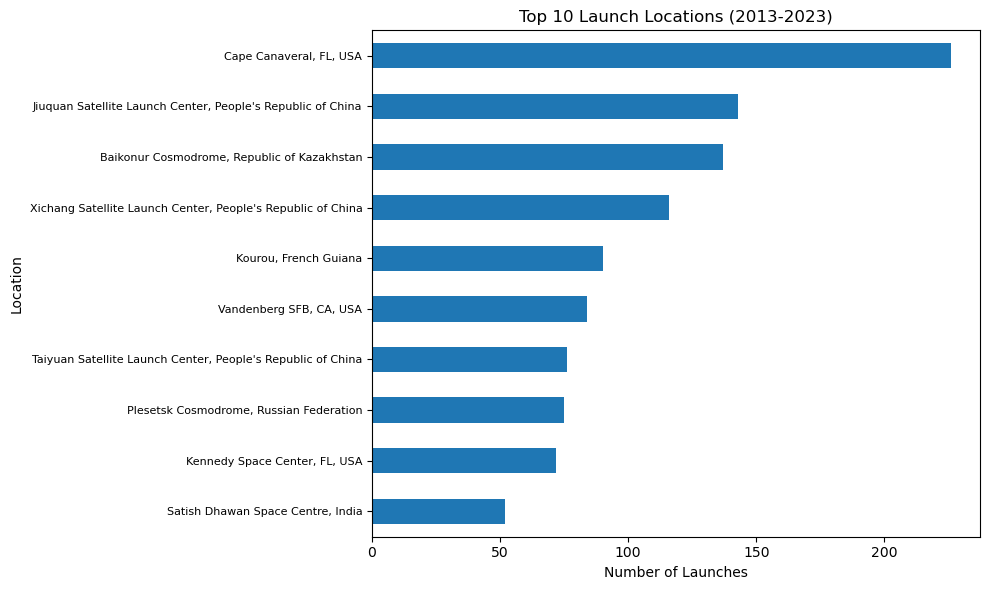

In [56]:
location_counts = df['location'].value_counts().head(10)  # Extract top 10 counts
location_counts = location_counts.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
bars = location_counts.plot(kind='barh')  # Horizontal bar chart
plt.xlabel('Number of Launches')
plt.ylabel('Location')
plt.title('Top 10 Launch Locations (2013-2023)')
plt.yticks(rotation=45)  # Rotate y-axis labels for better readability

# Rotate the y-axis tick labels and set font size
for tick in bars.get_yticklabels():
    tick.set_rotation(0)  # Keep horizontal orientation
    tick.set_fontsize(8)  # Adjust font size here

plt.tight_layout()
plt.show()

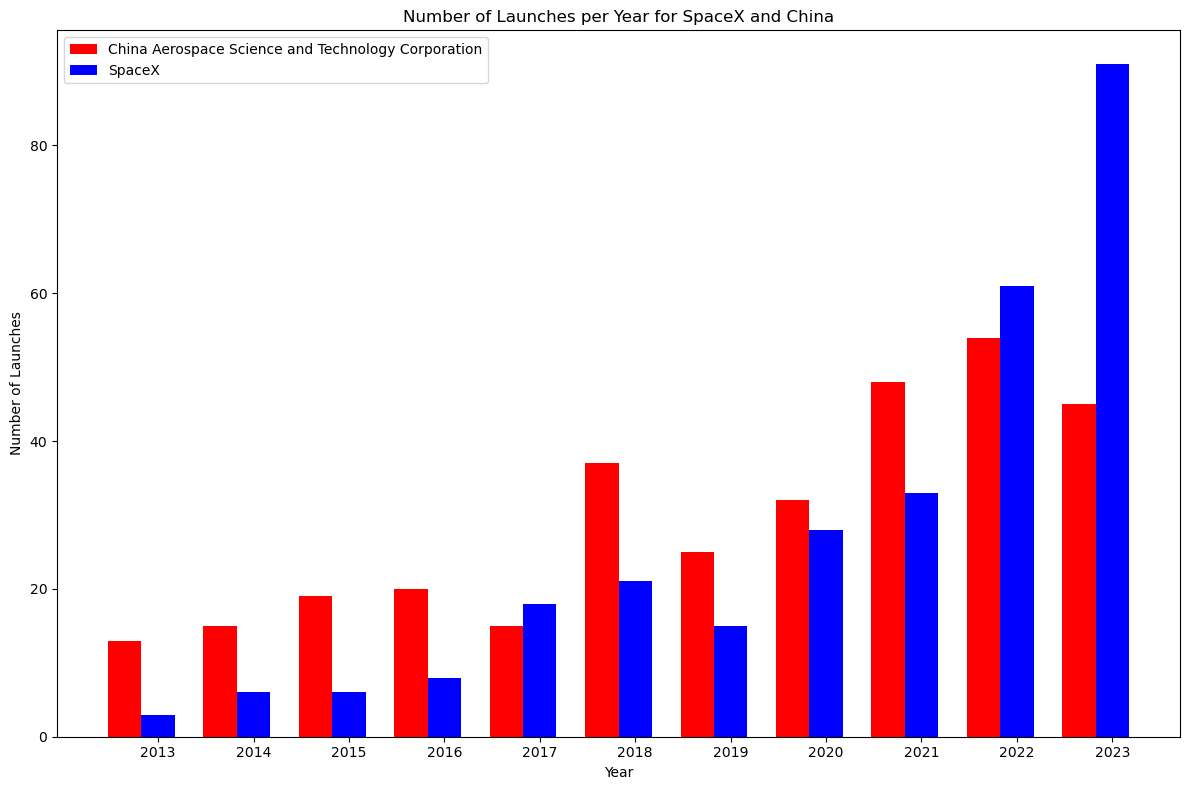

In [89]:
# Extract year from the 'date' column
df['year'] = df['date'].dt.year

# Filter data for SpaceX and China
selected_lsp = ['SpaceX', 'China Aerospace Science and Technology Corporation']
filtered_df = df[df['lsp_name'].isin(selected_lsp)]

# Grouping launches by year and lsp_name, counting the number of launches per year for each lsp_name
launches_per_year_lsp = filtered_df.groupby(['year', 'lsp_name']).size().unstack(fill_value=0)

colors = {'SpaceX': 'blue', 'China Aerospace Science and Technology Corporation': 'red'}

# Plotting a side-by-side bar chart for launches per year for SpaceX and China
plt.figure(figsize=(12, 8))

bar_width = 0.35
index = np.arange(len(launches_per_year_lsp))  # Generating an index range for the data

for i, lsp_name in enumerate(launches_per_year_lsp.columns):
    plt.bar(index + i * bar_width, launches_per_year_lsp[lsp_name], width=bar_width, label=lsp_name, color=colors[lsp_name])

plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Number of Launches per Year for SpaceX and China')
plt.xticks(index + bar_width * len(launches_per_year_lsp.columns) / 2, launches_per_year_lsp.index)  # Centering x-ticks
plt.legend()

plt.tight_layout()
plt.show()


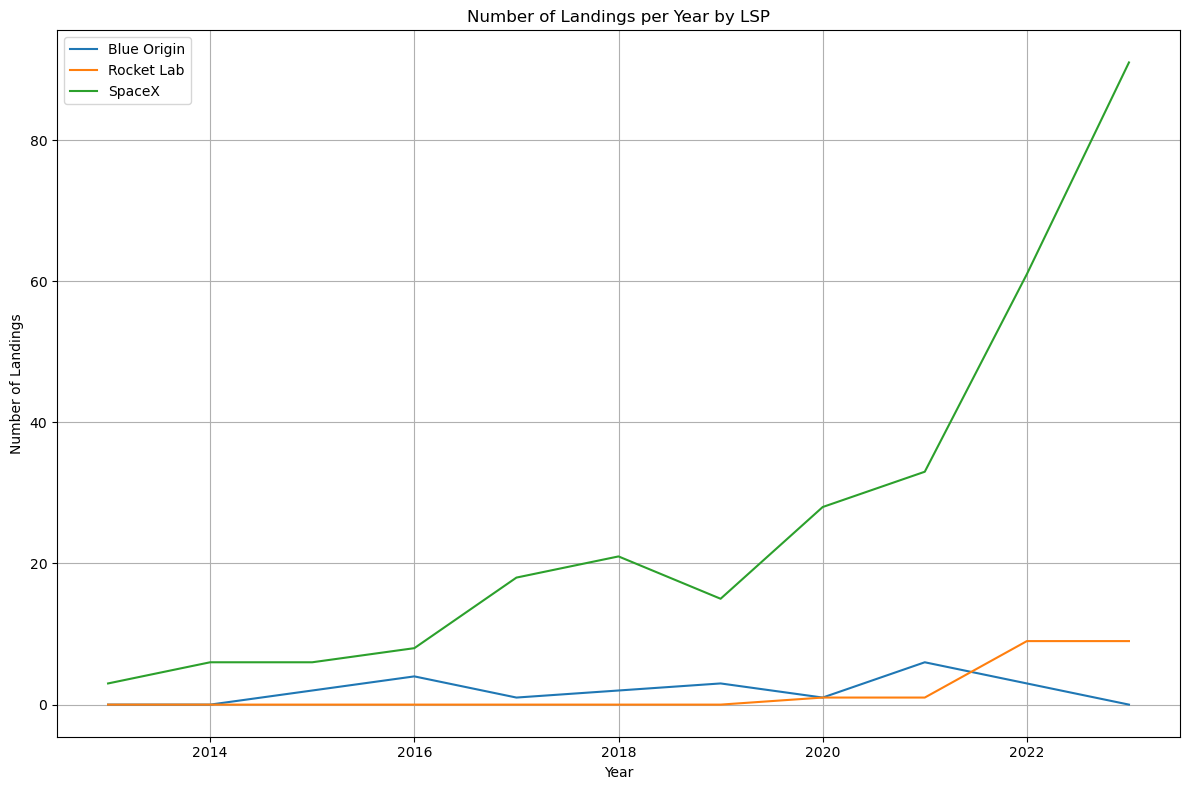

In [64]:

# Filter for rows with landing data available
landings_df = df[df['landing'].notnull()]

# Group by year and lsp_name, counting the number of landings per year for each lsp_name
landings_per_year_lsp = landings_df.groupby(['year', 'lsp_name']).size().unstack(fill_value=0)

# Plotting the count of landings per year for each lsp_name
plt.figure(figsize=(12, 8))

for lsp_name in landings_per_year_lsp.columns:
    plt.plot(landings_per_year_lsp.index, landings_per_year_lsp[lsp_name], label=lsp_name)

plt.xlabel('Year')
plt.ylabel('Number of Landings')
plt.title('Number of Landings per Year by LSP')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

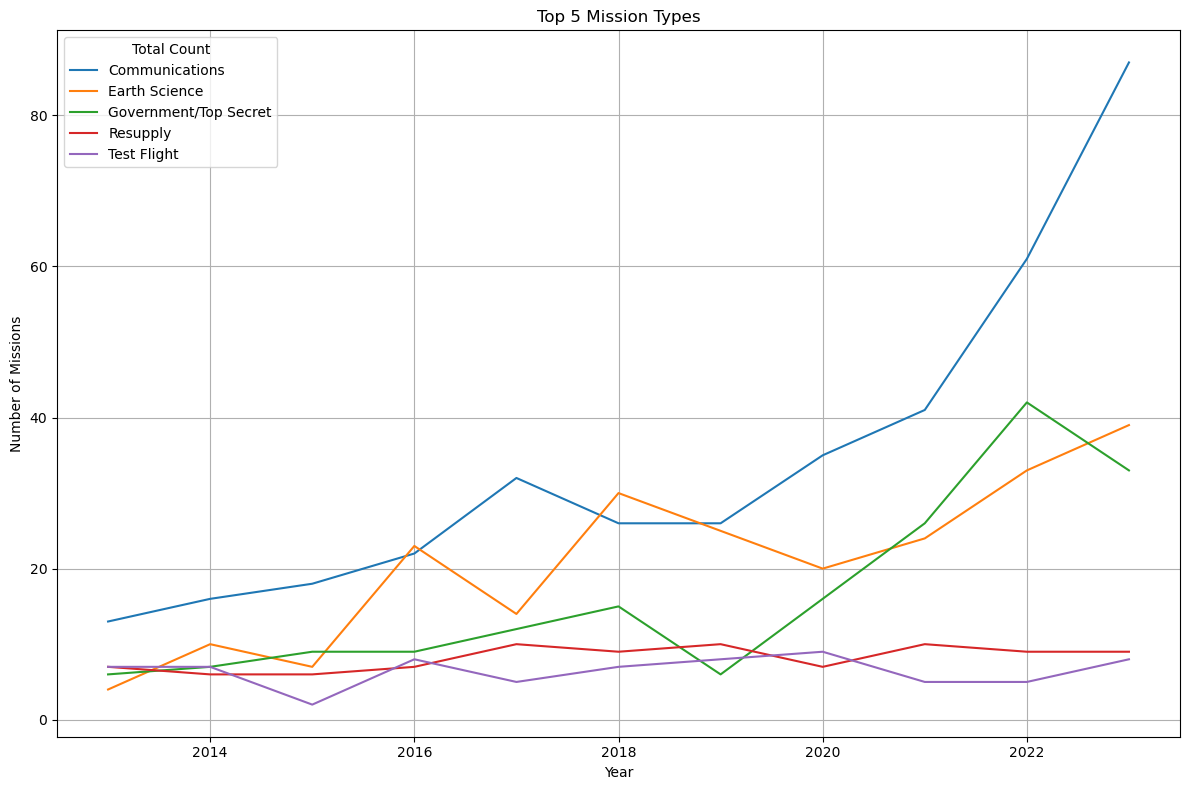

In [85]:
# Group by year and mission_type, counting the number of missions per year for each mission_type
missions_per_year_type = df.groupby(['year', 'mission_type']).size().unstack(fill_value=0)

# Get the top 5 mission types by the total count across all years
top_5_mission_types = missions_per_year_type.sum().nlargest(5).index.tolist()

# Filter the DataFrame to include only the top 5 mission types
missions_per_year_type_top5 = missions_per_year_type[top_5_mission_types]

# Plotting the count of missions per year for each of the top 5 mission types
plt.figure(figsize=(12, 8))

for mission_type in missions_per_year_type_top5.columns:
    plt.plot(missions_per_year_type_top5.index, missions_per_year_type_top5[mission_type], label=mission_type)

plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.title('Top 5 Mission Types')
plt.legend(title='Total Count')
plt.grid(True)
plt.tight_layout()
plt.show()